<a href="https://colab.research.google.com/github/AngelGarciaODiana/Behavioral-Neuroscience-2025/blob/main/Eyetracking_prueba_analisis_de_datos_(Hacer_una_copia).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Hola! Acordate antes de arrancar de hacer una copia de la Notebook en Archivo -> Guardar una copia en Drive**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
data = pd.read_csv('pupil_positions.csv')

In [ ]:
 data = data[['pupil_timestamp','confidence', 'diameter']].copy()

In [ ]:
data

,pupil_timestamp,confidence,diameter
0,270371.653941,0.999838,28.778638
1,270371.662010,0.999736,28.868202
2,270371.670079,0.999664,28.806581
3,270371.702355,0.999608,28.869951
4,270371.992840,0.999534,28.810605
...,...,...,...
39035,270888.499199,0.998281,27.322284
39036,270888.507268,0.999114,27.959831
39037,270888.515337,0.998124,27.475499
39038,270888.523406,0.998821,27.762273


In [ ]:
# Convert timestamps to seconds
# Assuming the first timestamp as the reference (0 second)
data['time_in_seconds'] = (data['pupil_timestamp'] - data['pupil_timestamp'][0])

In [ ]:
data

,pupil_timestamp,confidence,diameter,time_in_seconds
0,-814415.204489,0.388960,17.966811,0.000000
1,-814415.204489,0.518529,38.993546,0.000000
2,-814415.183646,0.492509,44.623390,0.020843
3,-814415.183646,0.464118,17.476759,0.020843
4,-814415.173735,0.762328,19.875685,0.030754
...,...,...,...,...
56217,-814187.142513,0.810618,20.502876,228.061976
56218,-814187.134889,0.837922,20.978089,228.069600
56219,-814187.134889,0.837922,20.977100,228.069600
56220,-814187.125877,0.264084,25.859054,228.078612


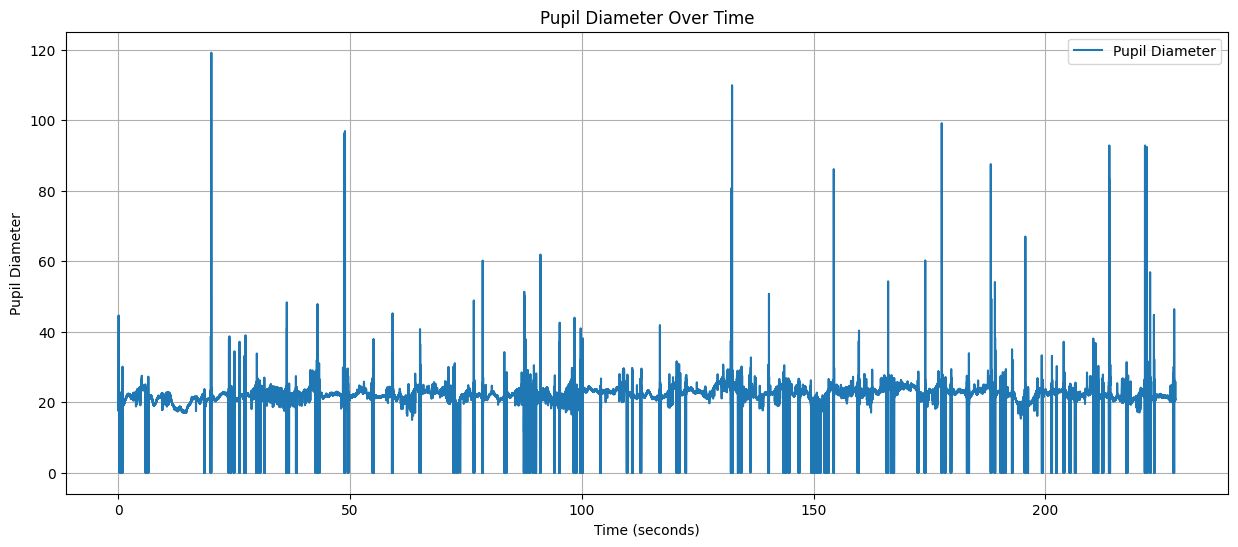

In [ ]:
plt.figure(figsize=(15, 6))
plt.plot(data['time_in_seconds'], data['diameter'], label='Pupil Diameter')
#plt.scatter(latencies_adjusted, np.interp(latencies_adjusted, df2['time_in_seconds'], df2['diameter']), color='red', label='Stimuli')
plt.xlabel('Time (seconds)')
plt.ylabel('Pupil Diameter')
plt.title('Pupil Diameter Over Time')
plt.legend()
plt.grid(True)
plt.show()

## Deblink

In [ ]:
# Cómo se les ocurre que podrían detectar parpadeos automáticamente? Detectenlos y conviertan esa data basura en NaN.

In [ ]:
data.diameter.mean()


21.69795674048853

In [ ]:
data.diameter.std()


4.592619995582634

In [ ]:
blink_threshold = data.diameter.mean() - data.diameter.std()

blink_threshold

17.105336744905895

In [ ]:
deblink1 = data.copy()

In [ ]:
# Identify blinks and set the 'diameter' value to NaN during blinks
deblink1.loc[deblink1['diameter'] < blink_threshold, 'diameter'] = np.nan

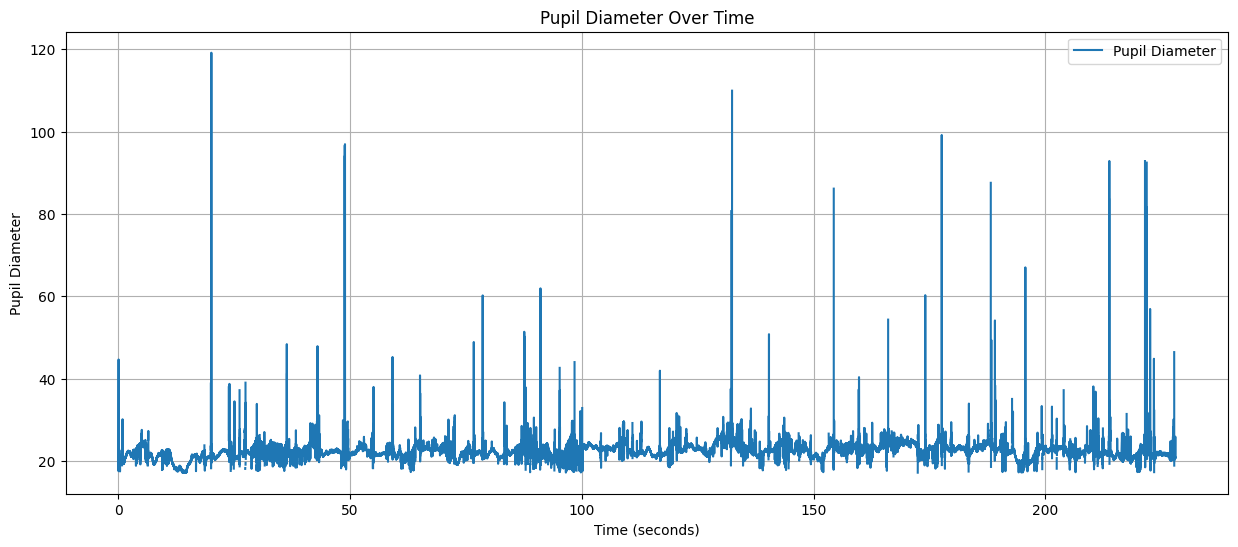

In [ ]:
plt.figure(figsize=(15, 6))
plt.plot(deblink1['time_in_seconds'], deblink1['diameter'], label='Pupil Diameter')
#plt.scatter(latencies_adjusted, np.interp(latencies_adjusted, df2['time_in_seconds'], df2['diameter']), color='red', label='Stimuli')
plt.xlabel('Time (seconds)')
plt.ylabel('Pupil Diameter')
plt.title('Pupil Diameter Over Time')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
deblink2 = data.copy()

In [ ]:
# Calculate the change in diameter
deblink2['diameter_diff'] = deblink2['diameter'].diff().abs()

# Define a threshold for sudden changes (this can be adjusted based on your specific data)
change_threshold = 5.0

# Identify blinks based on sudden changes and set the 'diameter' value to NaN during blinks
deblink2.loc[deblink2['diameter_diff'] > change_threshold, 'diameter'] = np.nan


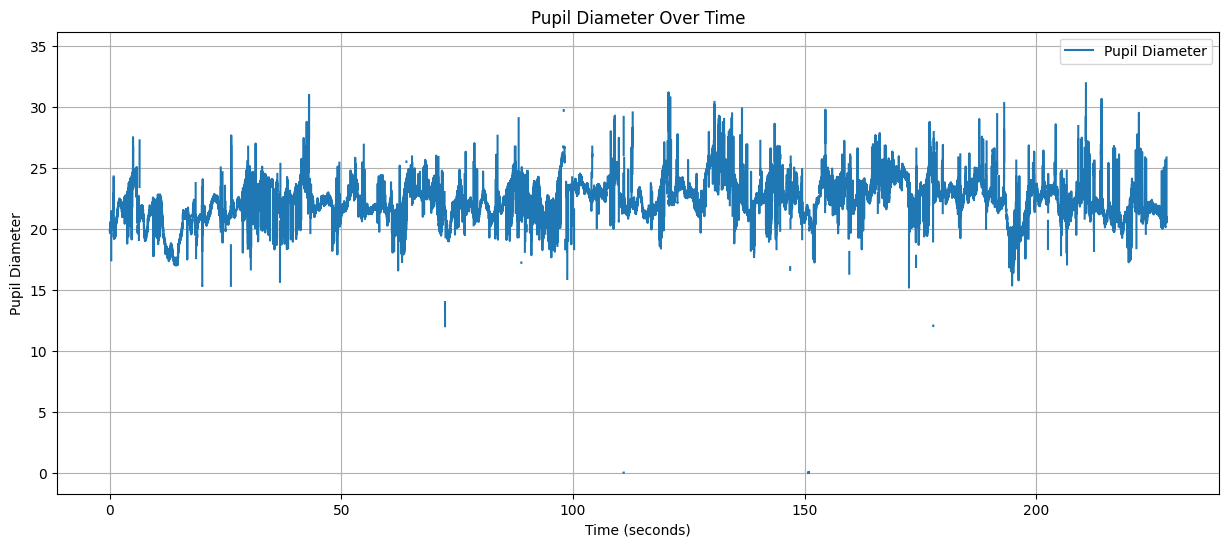

In [ ]:
plt.figure(figsize=(15, 6))
plt.plot(deblink2['time_in_seconds'], deblink2['diameter'], label='Pupil Diameter')
#plt.scatter(latencies_adjusted, np.interp(latencies_adjusted, df2['time_in_seconds'], df2['diameter']), color='red', label='Stimuli')
plt.xlabel('Time (seconds)')
plt.ylabel('Pupil Diameter')
plt.title('Pupil Diameter Over Time')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
deblink3 = data.copy()

In [ ]:
# Define a threshold for low confidence (this can be adjusted based on your specific data)
confidence_threshold = 0.7

# Identify blinks based on low confidence and set the 'diameter' value to NaN during blinks
deblink3.loc[deblink3['confidence'] < confidence_threshold, 'diameter'] = np.nan

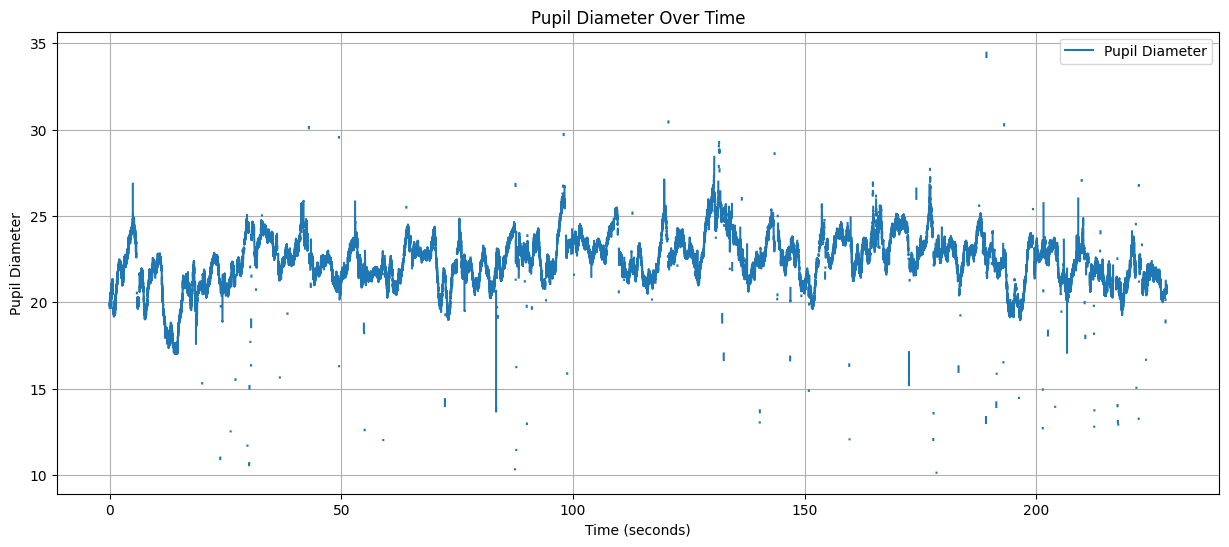

In [ ]:
plt.figure(figsize=(15, 6))
plt.plot(deblink3['time_in_seconds'], deblink3['diameter'], label='Pupil Diameter')
#plt.scatter(latencies_adjusted, np.interp(latencies_adjusted, df2['time_in_seconds'], df2['diameter']), color='red', label='Stimuli')
plt.xlabel('Time (seconds)')
plt.ylabel('Pupil Diameter')
plt.title('Pupil Diameter Over Time')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
deblink1.diameter.describe()

,diameter
count,54091.000000
mean,22.493677
std,2.099703
min,17.107418
25%,21.515916
50%,22.457328
75%,23.394933
max,119.175095


In [ ]:
deblink2.diameter.describe()

count    15350.000000
mean        21.729278
std          2.161016
min          0.000000
25%         21.070570
50%         21.874523
75%         22.691647
max         30.993330
Name: diameter, dtype: float64

In [ ]:
deblink3.diameter.describe()

count    14258.000000
mean        21.794573
std          1.563661
min         10.579171
25%         21.080814
50%         21.864139
75%         22.650964
max         30.154878
Name: diameter, dtype: float64